<a href="https://colab.research.google.com/github/KhoaKD59/HomeworkW42023/blob/main/Electric_Cooker_by_Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

70.00000000000001


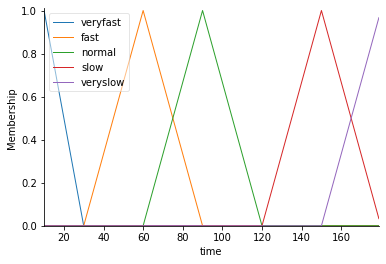

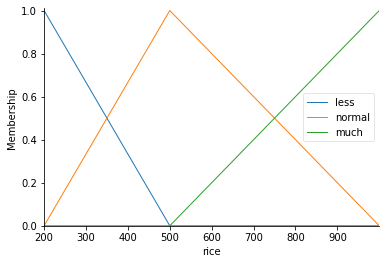

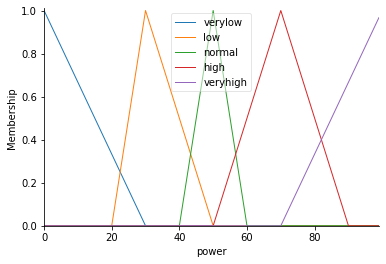

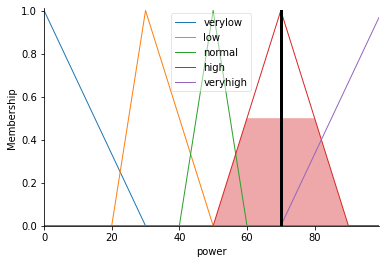

In [12]:
#pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#Tạo tên biến "time", "rice" và "power"
time = ctrl.Antecedent(np.arange(10,180,1), 'time') # tạo mảng arange tương ứng với thời gian từ 10 đến 180 phút
rice = ctrl.Antecedent(np.arange(200,1000,1), 'rice') # tạo mảng arange lượng gạo 200g đến 1000g
power = ctrl.Consequent(np.arange(0,100,1), 'power') # tạo mảng arange nhiệt độ từ 0 đến 100
# tao ham cho tung member
# add mức độ thành viên cho từng mức của thời gian
time['veryfast'] = fuzz.trimf(time.universe, [10,10,30])
time['fast'] = fuzz.trimf(time.universe, [30,60,90])
time['normal'] = fuzz.trimf(time.universe, [60,90,120])
time['slow'] = fuzz.trimf(time.universe, [120,150,180])
time['veryslow'] = fuzz.trimf(time.universe, [150,180,180])

# add mức độ thành viên cho từng mức cho lượng gạo
rice['less'] = fuzz.trimf(rice.universe, [200,200,500])
rice['normal'] = fuzz.trimf(rice.universe, [200,500,1000])
rice['much'] = fuzz.trimf(rice.universe, [500,1000,1000])
# add mức độ thành viên cho từng mức cho nhiệt độ
power['verylow']= fuzz.trimf(power.universe,[0,0,30])
power['low']= fuzz.trimf(power.universe,[20,30,50])
power['normal']= fuzz.trimf(power.universe,[40,50,60])
power['high']= fuzz.trimf(power.universe,[50,70,90])
power['veryhigh']= fuzz.trimf(power.universe,[70,100,100])

rule = [] #viết luật cho CT
#Xây dựng luật cho thời gian vfast

rule.append(ctrl.Rule(time['veryfast'] & rice['less'], power['normal']))
rule.append(ctrl.Rule(time['veryfast'] & rice['normal'], power['high']))
rule.append(ctrl.Rule(time['veryfast'] & rice['much'], power['veryhigh']))
#Xây dựng luật cho thời gian Fast
rule.append(ctrl.Rule(time['fast'] & rice['less'], power['normal']))
rule.append(ctrl.Rule(time['fast'] & rice['normal'], power['high']))
rule.append(ctrl.Rule(time['fast'] & rice['much'], power['veryhigh']))
#Xây dựng luật cho thời gian Normal
rule.append(ctrl.Rule(time['normal'] & rice['less'], power['low']))
rule.append(ctrl.Rule(time['normal'] & rice['normal'], power['normal']))
rule.append(ctrl.Rule(time['normal'] & rice['much'], power['high']))
#Xây dựng luật cho thời gian Slow
rule.append(ctrl.Rule(time['slow'] & rice['less'], power['low']))
rule.append(ctrl.Rule(time['slow'] & rice['normal'], power['normal']))
rule.append(ctrl.Rule(time['slow'] & rice['much'], power['high']))
#Xây dựng luật cho thời gian vSlow
rule.append(ctrl.Rule(time['veryslow'] & rice['less'], power['verylow']))
rule.append(ctrl.Rule(time['veryslow'] & rice['normal'], power['normal']))
rule.append(ctrl.Rule(time['veryslow'] & rice['much'], power['normal']))

#Control system( Thống nhất luật)
cooker_control = ctrl.ControlSystem(rule)
cooker_simulation = ctrl.ControlSystemSimulation(cooker_control)

time.view()
rice.view()
power.view()

# Compute (nhập gái trị để tính toán)
cooker_simulation.input['rice'] = 500
cooker_simulation.input['time'] = 20

cooker_simulation.compute()

print(cooker_simulation.output['power'])

# power
power.view(sim = cooker_simulation)
